# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake


# Task 1. Data Validation & Cleaning


In [1]:
# Importing required libraries and getting overview to start cleaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Loading the dataset and view the first few rows
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [2]:
# Displaying a total of rows and cols
df.shape

(15000, 8)

In [3]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
# Checking for duplicates
df.duplicated().sum()

0

In [5]:
# Generating a summary of unique values, data types, and missing values for each column
data = []
for col in df.columns:
    unique_values = df[col].unique()
    num_unique = len(unique_values)
    dtype = df[col].dtype
    missing = df[col].isna().sum()
    if num_unique > 50:
        data.append((col, num_unique, "", dtype, missing))
    else:
        unique_values_str = ", ".join(map(str, unique_values))
        data.append((col, num_unique, unique_values_str, dtype, missing))

summary = pd.DataFrame(data, columns=["Column", "# of Uniques", "Unique Values (<10)", "Dtype", 'Missing'])
summary.sort_values(by='# of Uniques').reset_index(drop=True)

,Column,# of Uniques,Unique Values (<10),Dtype,Missing
0,sales_method,5,"Email, Email + Call, Call, em + call, email",object,0
1,week,6,"2, 6, 5, 4, 3, 1",int64,0
2,nb_sold,10,"10, 15, 11, 9, 13, 8, 12, 7, 14, 16",int64,0
3,nb_site_visits,27,"24, 28, 26, 25, 22, 31, 23, 30, 21, 27, 32, 29...",int64,0
4,years_as_customer,42,"0, 1, 6, 3, 10, 9, 7, 4, 2, 20, 8, 5, 17, 36, ...",int64,0
5,state,50,"Arizona, Kansas, Wisconsin, Indiana, Illinois,...",object,0
6,revenue,6744,,float64,1074
7,customer_id,15000,,object,0


In [6]:
# Cleaning `sales_method` variable
# -----------------------------------
# Checking total value
df['sales_method'].value_counts()

Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: sales_method, dtype: int64

In [7]:
# Replacing inconsistent values in the "sales_method" column
df['sales_method'] = df['sales_method'].replace(r'\w\w\s\+\scall', 'Email + Call', regex=True)
df['sales_method'] = df['sales_method'].replace('email', 'Email')

In [8]:
# Confirming only 3 unique values
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [9]:
# Cleaning `revenue` variable
# -----------------------------------
# Calculating the percentage of missing values for `revenue`
missing_percentage = df['revenue'].isnull().sum() / len(df) * 100
missing_percentage

7.16

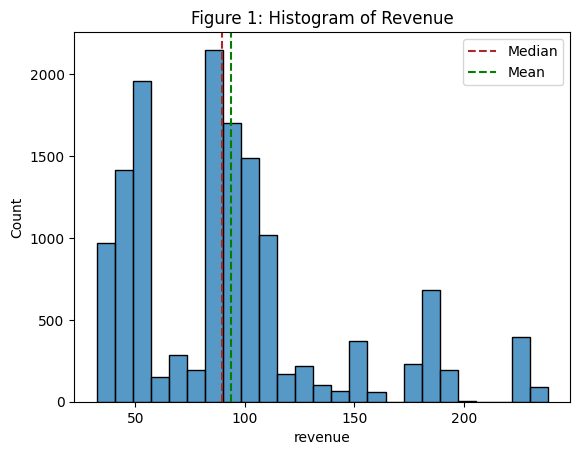

In [10]:
# Checking the distribution of the `revenue`
sns.histplot(data=df, x='revenue', bins=25)
plt.title("Figure 1: Histogram of Revenue")
plt.axvline(df['revenue'].median(), color='brown', linestyle='--', label='Median')
plt.axvline(df['revenue'].mean(), color='green', linestyle='--', label='Mean')
plt.legend();

In [11]:
# Imputing missing values with median
revenue_median = df['revenue'].median()
df['revenue'] = df['revenue'].fillna(revenue_median)

In [12]:
# Confirming no missing values
df['revenue'].isna().sum()

0

In [13]:
# Cleaning `years_as_customers` variable
# -----------------------------------
# Calculating the threshold based on the current year and the founding year (1984)
years_threshold = datetime.now().year - 1984

# Filtering the df to find rows with 'years_as_customer' greater than the threshold
df[df['years_as_customer'] > years_threshold]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [14]:
# Removing anomalies from df
df = df[~(df['years_as_customer'] > years_threshold)]

In [15]:
# Rechecking info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14998 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               14998 non-null  int64  
 1   sales_method       14998 non-null  object 
 2   customer_id        14998 non-null  object 
 3   nb_sold            14998 non-null  int64  
 4   revenue            14998 non-null  float64
 5   years_as_customer  14998 non-null  int64  
 6   nb_site_visits     14998 non-null  int64  
 7   state              14998 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 1.0+ MB


## Summary of Data Validation:
The dataset initially comprised 15,000 rows and 8 columns, containing a mix of three categorical and five numerical features before undergoing the validation and cleaning process. The following steps were taken to ensure data accuracy:

- Week (**week**): This integer variable, representing weeks since the product launch, exhibits 6 unique values ranging from 1 to 6. No cleaning was required for this column.

- Sales Method (**sales_method**): This categorical variable represents different sales approaches. Ideally, it should have had 3 unique values, but there were 5 due to inconsistencies, with "em + call" and "email" appearing as typos or variations of "Email" and "Email + Call". These inconsistencies were rectified for data integrity.

- Customer ID (**customer_id**): Serving as a unique identifier for customers, there were 15,000 unique customer IDs in this categorical variable, used to uniquely identify customers. No cleaning was necessary for this column.

- Number of Sold Items (**nb_sold**): An integer variable, which exhibited 10 unique values, indicating the number of new products sold. It is categorized as a discrete numerical variable, and no cleaning was needed for this column.

- Revenue (**revenue**): This continuous numerical variable, represented as a float, was the only variable in the dataset with missing data. Specifically, there were 1074 missing values, accounting for approximately 7.16% of the data within the revenue variable. In response, the missing values were imputed to maximize the available data. In this case, median imputation was chosen due to the right-skewed distribution of the revenue variable. The imputation process was successfully completed.

- Years as Customer (**years_as_customer**): This integer variable initially exhibited 42 unique values, reflecting the number of years as a customer. However, it should ideally have contained only 40 unique values (ranging from 0 to 39), aligning with the age of the company, which is 39 years (as of 2023, subtracting the founding year of 1984). Anomalies in this variable were identified in two rows and subsequently removed to ensure data accuracy.

- Number of Site Visits (**nb_site_visits**): This integer variable presented 27 unique values, representing the number of site visits. It was another discrete numerical variable, and no cleaning was required for this column.

- State (**state**): A categorical variable with 50 unique values, indicating different states in the US. It's categorized as a categorical variable with a relatively large number of categories. No cleaning was necessary for this column.

Following the data validation and cleaning steps, the dataset was refined, resulting in a final dataset with 14,998 records and 8 columns, with no missing values, anomalies, or duplicates. This refined dataset ensures data accuracy and integrity.

# Task 2. Exploratory Analysis
## 1. How many customers were there for each approach?

In [16]:
df['sales_method'].value_counts(normalize=True).round(2)

Email           0.50
Call            0.33
Email + Call    0.17
Name: sales_method, dtype: float64

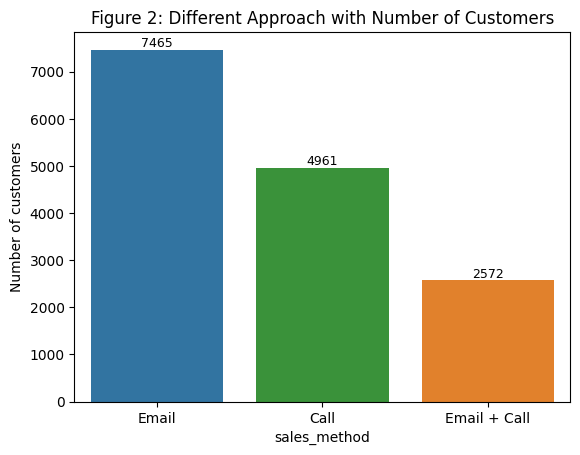

In [17]:
# Ploting each sales approach with number of customers
sns.countplot(data=df, x='sales_method',  order=df['sales_method'].value_counts().index, hue='sales_method', legend=False)
plt.title(f"Figure 2: Different Approach with Number of Customers")
plt.ylabel("Number of customers")
for i, v in enumerate(df['sales_method'].value_counts().values):
    plt.text(i, v, str(v), ha='center', va='bottom', color='black', fontsize=9)

Upon examining the data with value_counts and referencing Figure 2, the distribution of customers approached via different methods is as follows:

- **Email**: The "Email" approach was employed with 7465 customers, constituting approximately 50% of the total approaches.

- **Call**: The "Call" approach was utilized with 4961 customers, accounting for roughly 33% of the approaches.

- **Email + Call**: The "Email + Call" method had the lowest number of customers approached, totaling 2572, which corresponds to approximately 17% of the total approaches.

## 2. What does the spread of the revenue look like overall? And for each method?

In [18]:
df[['revenue']].describe(percentiles=[.05, .25, .5, .75, .95]).round(2).T

,count,mean,std,min,5%,25%,50%,75%,95%,max
revenue,14998.0,93.62,45.72,32.54,39.47,53.04,89.5,106.07,188.27,238.32


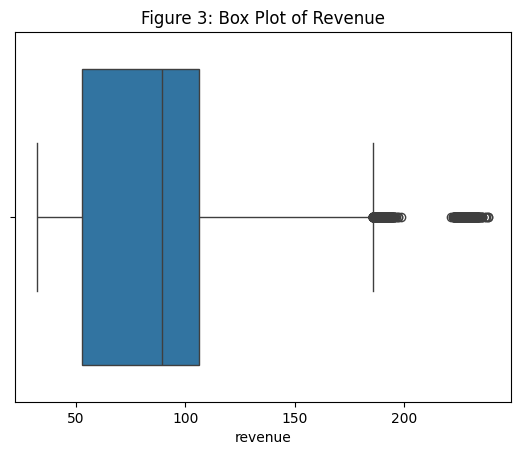

In [19]:
# Visualizing revenue
sns.boxplot(data=df, x='revenue')
plt.title("Figure 3: Box Plot of Revenue");

In exploration of revenue, supported by the descriptive table, Figure 1 and Figure 3, several key findings emerge:

- _Skewed Distribution_: The revenue distribution exhibits a right-skewed pattern, signifying that the majority of revenue values are concentrated towards the lower end of the scale, with a significant proportion of revenue falls under the 100 USD.

- _Revenue Range_: The recorded revenue spans from a minimum of 32.54 USD to a maximum of 238.32 USD, illustrating a wide range of transaction values.

- _Measures of Central Tendency_: The median revenue, at approximately 89.5 USD, is marginally lower than the mean revenue, which stands at 93.62 USD. This supports for the skewness above.

- _Spread (Standard Deviation)_: The standard deviation (std) of 45.75 USD quantifies the extent of dispersion in the revenue data. A high standard deviation implies a widely spread of revenue values.

- _Outliers_: The boxplot indicates that values exceeding 160 USD are considered outliers. Notably, two distinct groups of outliers can be identified, one around the 180 USD and another at the higher end of the revenue scale.

By incorporating these insights, the revenue distribution in association with the various approaches used can be better understood.

In [20]:
# Grouping revenue by 'sales_method' and calculate the sum and percentage of revenue
result = df.groupby('sales_method')['revenue'].agg(['sum', lambda x: x.sum() / df['revenue'].sum() * 100, 'min', 'mean','max'])

# Renaming the columns of revenue table
result.columns = ['total', 'percentage', 'min', 'avg', 'max']

result.round(2).sort_values(by='total', ascending=False)

,total,percentage,min,avg,max
sales_method,,,,,
Email,720908.61,51.34,78.83,96.57,148.97
Email + Call,439492.19,31.30,89.50,170.88,238.32
Call,243712.52,17.36,32.54,49.13,89.50


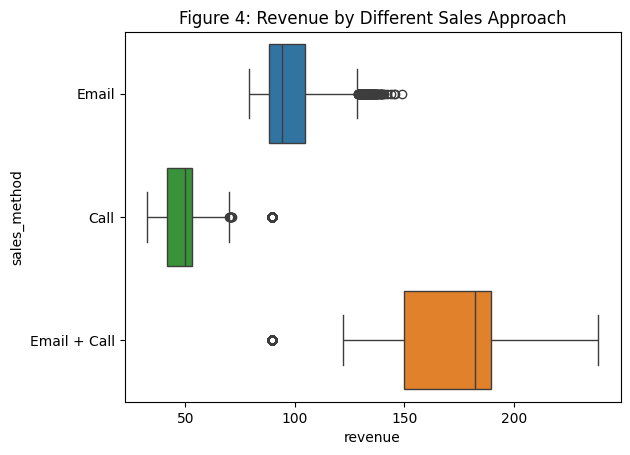

In [21]:
sns.boxplot(data=df, x='revenue', y='sales_method', order = ['Email', 'Call', 'Email + Call'], hue='sales_method', legend=False)
plt.title("Figure 4: Revenue by Different Sales Approach");

From the summarized Revenue by Sales Approach in the grouped revenue table and Figure 4, several key insights emerge:

- _Total Revenue by Each Approach_: Email stands out as the top revenue generator, which aligns with its extensive customer outreach. However, what's intriguing is that "Email + Call" secures the second position in terms of total revenue, accumulating nearly 440k USD, almost twice the revenue of "Call," which achieves only 243k USD in total.

- _Revenue Range Per Customer Variation_: "Email + Call" exhibits the widest range, spanning from 89.5 USD to 238.32 USD, indicating high variability and high revenue. In contrast, "Call" has a narrower range, from 32.54 USD to 89.5 USD, suggiesting low variability, and "Email" ranges from 78.83 USD to 148.97 USD.

- _Concentration of Values_: An indepth analysis reveals that the majority of revenue for "Email + Call" clusters around 170.88 USD, demonstrating the highest average revenue per customer. This figure is nearly double that of "Email" (96.57 USD) and approximately four times that of "Call" (49.13 USD).

These findings offer a fascinating perspective on revenue generation. While "Email" dominates in terms of total revenue, the remarkable performance of "Email + Call" stands out with its higher average revenue and broader revenue range. "Call," on the other hand, faces challenges despite significant efforts (approximately 30 minutes per customer), and the average revenue earned per customer remains relatively low after 6 weeks.

## 3. Was there any difference in revenue over time for each of the methods?

In [22]:
# Grouping the revenue by `sales_method` and `week` 
group_revenue_by_method_week = df.groupby(['sales_method', 'week'])['revenue'].sum().reset_index()
# Calculating cumulative revenue over weeks
group_revenue_by_method_week['cumulative_revenue'] = group_revenue_by_method_week.groupby('sales_method')['revenue'].cumsum()
# Pivoting the results
revenue_by_method_week = group_revenue_by_method_week.pivot(index='week', columns='sales_method', values='revenue')
cummulative_revenue_by_method_week = group_revenue_by_method_week.pivot(index='week', columns='sales_method', values='cumulative_revenue')

# Re-ordering the columns in the pivot table
revenue_by_method_week = revenue_by_method_week[['Email', 'Call', 'Email + Call']]
cummulative_revenue_by_method_week = cummulative_revenue_by_method_week[['Email', 'Call', 'Email + Call']]


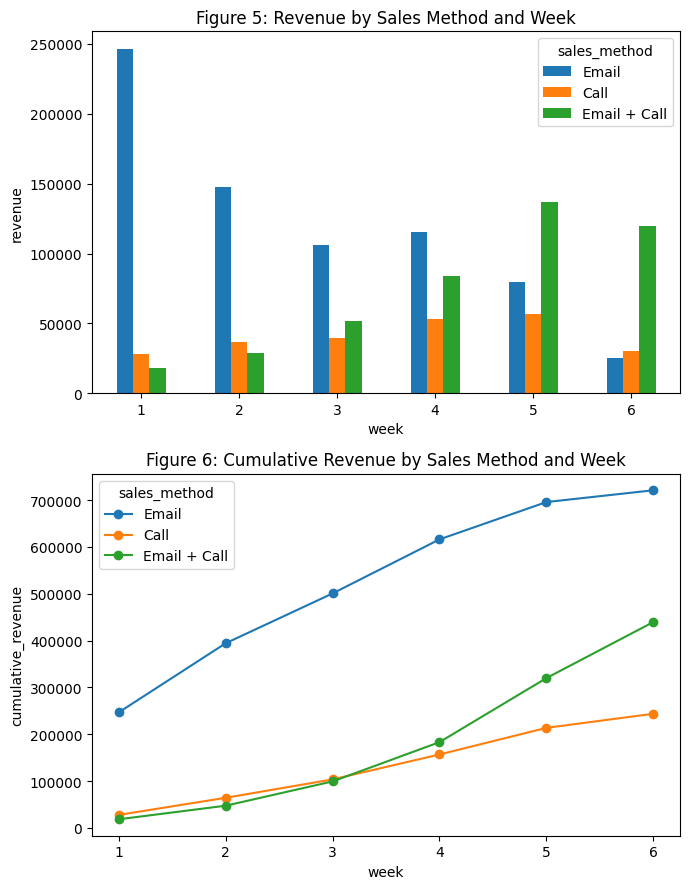

In [23]:
# Creating subplots with two columns
fig, axes = plt.subplots(2, 1, figsize=(7, 9))

# Ploting the bar chart for revenue in the first subplot
revenue_by_method_week.plot(kind='bar', ax=axes[0], title='Figure 5: Revenue by Sales Method and Week')
axes[0].set_xlabel('week')
axes[0].set_ylabel('revenue')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Ploting the line graph for cumulative revenue in the second subplot
cummulative_revenue_by_method_week.plot(kind='line', ax=axes[1], marker='o', title='Figure 6: Cumulative Revenue by Sales Method and Week')
axes[1].set_xlabel('week')
axes[1].set_ylabel('cumulative_revenue')
plt.tight_layout()

The element of time (week) was added to revenue. Figure 5 and Figure 6 demonstrate further insights:

- _Revenue Trends Over Time_: While the total revenue of "Email" decreases over the weeks, the total revenue of "Call" and "Email + Call", on the other hand, increased as the weeks progressed.

- _"Email" Revenue_: The total revenue generated by "Email" shows a decline over the weeks. It begins impressively with almost 250 USD in the first week but then plummets to just over 100k USD in the second week. There's a slight rise in week 4 due to follow-up emails, but it significantly drops to just under 25k USD in the sixth week - being the lowest revenue acquired in week 6.

- _"Call" Revenue_: In contrast, "Call" starts the first week with strong revenue, reaching almost 30k USD, but its revenue growth remains limited. It reaches a peak of approximately 55k USD in the fifth week.

- _"Email + Call" Revenue_: "Email + Call" displays a different trajectory. It demonstrates growth in the third week, reaching 50k USD. In week 5 and 6, this approach brought highest revenue earned around 130k USD.

- _"Comparison"_: From the third week onwards, "Email + Call" starts to consistently outperform the cumulative revenue of the "Call" approach, and this difference increases as the weeks progress. This indicates that "Email + Call" becomes more lucrative than "Call" over time. Meanwhile, "Email" seems to be more effective in the first few weeks after launching but decreased over time.

## 4. Based on the data, which method would you recommend we continue to use?

After conducting an in-depth Exploratory Data Analysis, it becomes evident that the "Email + Call" approach stands out as the most effective strategy for the sales team to target.

Despite approaching only 2,572 customers in the last 6 weeks, which is one-third of the "Email" approach, "Email + Call" approach has yielded a remarkably high revenue. With an average of 84,217.07 USD per week, it is comparable to the 94,845.51 USD generated by the "Email" approach. Additionally, it demands significantly less effort from the sales team when compared to the labor-intensive "Call" approach.

To put this into perspective, if the number of customers approached using the "Email + Call" method were increased threefold to match the number of "Email" approaches, the potential for revenue growth would be substantial.

The **recommendation** would be fot the sales team to focus on and potentially expand the "Email + Call" approach, as it has demonstrated the capacity to deliver strong results combined with the efficient use of resources.


In [24]:
# Calculating average increase in revenue for each approach each week
average_increase_per_approach = {}

# Iterating through the sales methods
for method in ['Email', 'Call', 'Email + Call']:
    method_data = cummulative_revenue_by_method_week[method].values
    weekly_increase = method_data[1:] - method_data[:-1]  # Calculate the weekly revenue differences
    average_increase = weekly_increase.mean()  # Calculate the mean of weekly revenue differences
    average_increase_per_approach[method] = average_increase

# Displaying the average increase in revenue for each approach each week
print("Average Weekly Increase in Revenue for Each Approach:")
for method, average_increase in average_increase_per_approach.items():
    print(f"- {method}: ${average_increase:.2f}")

Average Weekly Increase in Revenue for Each Approach:
- Email: $94845.51
- Call: $43188.47
- Email + Call: $84217.07


# Task 3. Business Metrics

**Metric**: Average Revenue per Customer by Sales Method.

Definition: The "Average Revenue per Customer by Sales Method" metric is defined as the average revenue generated from customers for each of the different sales methods employed by the business. It measures the effectiveness of each sales approach ("Email," "Call," and "Email + Call") in terms of revenue contribution per customer.

## How to Use the Metric

In the previous Exploratory Data Analysis section, we uncovered that customers within each sales group exhibit varying preferences for products at different price points. Understanding this distinction is crucial for creating targeted marketing strategies and promotions that align with the customers' affordability and needs.

To effectively utilize this metric, businesses can leverage the insights gained from analyzing the distribution of new product adoption within each sales method in combination with demographic distribution.

The "Average Revenue per Customer by Sales Method" metric serves as a valuable tool for businesses to evaluate the revenue generation effectiveness of each sales method, including "Email," "Call," and "Email + Call." Monitoring this metric enables data-driven decisions regarding resource allocation, sales strategies, and customer segmentation.

By continuously tracking and analyzing this metric, businesses can refine their approach and adapt to changing customer behaviors, ultimately improving their revenue generation strategies.

## Initial Metric Values
Based on the current 6-week data and my calculation below, here are the estimated initial values for the "Average Revenue per Customer by Sales Method" metric:

- Email + Call: 170.88 USD per customer
- Email: 96.57 USD per customer
- Call: 49.13 USD per customer
These values align with our previous analysis, where "Email + Call" stands out as the most profitable approach, generating an average revenue of 170.88 USD per customer. "Email" and "Call" follow with 96.57 USD and 49.13 USD, respectively.

These initial values provide a valuable benchmark for the business. They can be used as a baseline to set performance targets and to monitor changes in revenue generation in subsequent weeks or future marketing campaigns.



In [25]:
# Group the data by 'sales_method' and 'customer_id' and calculate the total revenue
revenue_by_customer = df.groupby(['sales_method', 'customer_id'])['revenue'].sum().reset_index()
# Calculate the average revenue per customer for each sales method
average_revenue_by_method = revenue_by_customer.groupby('sales_method')['revenue'].mean().sort_values(ascending=False).round(2)

print(average_revenue_by_method)

sales_method
Email + Call    170.88
Email            96.57
Call             49.13
Name: revenue, dtype: float64


# Task 4. Final Summary & Recommendations

Following a thorough examination of the provided data, we have acquired valuable insights into the effectiveness of various sales approaches employed by the business. Presented below is a condensed overview of our findings, accompanied by pertinent recommendations for the business.

## Summary

### Revenue Analysis
- Sales Method Performance: "Email + Call" surpasses both "Email" and "Call" in terms of revenue generation. Although "Email" has a higher customer count, the revenue produced by "Email + Call" surpasses it, indicating a more impactful approach.

### Time Trends
- Revenue Trends Over Time: "Email" demonstrates an initial revenue peak that diminishes over time, while "Call" and "Email + Call" exhibit escalating revenues. Although "Email" may be more effective initially, "Email + Call" becomes increasingly lucrative over time.

### Metric for Monitoring
- Average Revenue per Customer by Sales Method: Continuous monitoring of this metric is essential for evaluating the revenue-generating efficacy of each sales method. It facilitates data-driven decisions regarding resource allocation, sales strategy, and customer segmentation.


## Recommendations

1. **Prioritize "Email + Call"**: Given its superior revenue performance over time, the business should consider allocating more resources and focus on the "Email + Call" approach. This approach has the potential to maximize revenue and reach a broader customer base.
2. **Targeted "Emails"**: The "Email" approach also displayed somewhat positive results that trended upwards throughout the 6-week period. Thus, I would suggest the company conveys stronger value in messages with more targeted emails into their strategy as this could be a way to add some extra revenue to the pipeline with relatively no extra effort.
3. **Continuous Monitoring**: Regularly track and analyze the "Average Revenue per Customer by Sales Method" metric to refine sales strategies and adapt to changing customer behaviors. This will lead to improved revenue generation strategies over time.
4. **Improve Data Collection practices**: There were 1074 missing values in the revenue column and this missing information could be the difference between achieving the goal or not. Thus, it is important to pay extra attention to Data Quality and Collection techniques.

By implementing these recommendations and considering the insights gained from this analysis, the business can optimize its sales methods, gain a deeper understanding of customer preferences, and enhance overall revenue generation efforts. This data-driven approach positions the business for sustained growth and success.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation